In [2]:
import polars as pl
from plotnine import *
from mizani.formatters import label_comma, label_dollar

file = 'https://raw.githubusercontent.com/usefulmove/code/refs/heads/main/ekso/EKSO.csv'

df = pl.read_csv(file)

df

Date,Open,High,Low,Close,Adj Close,Volume
str,f64,f64,f64,f64,f64,i64
"""2014-01-17""",252.0,267.75,246.75,257.25,257.25,1500
"""2014-01-21""",266.700012,286.649994,266.700012,278.25,278.25,1700
"""2014-01-22""",288.75,288.75,262.5,278.25,278.25,800
"""2014-01-23""",267.75,278.25,248.850006,248.850006,248.850006,600
"""2014-01-24""",250.425003,278.25,249.375,266.700012,266.700012,200
…,…,…,…,…,…,…
"""2020-05-18""",3.2,3.24,3.07,3.141,3.141,40600
"""2020-05-19""",3.11,3.194,2.985,3.15,3.15,60600
"""2020-05-20""",3.17,3.29,3.07,3.24,3.24,58300


In [3]:
df = df.with_columns(
    (pl.col('Volume') * pl.col('Adj Close')).alias('Volume (Currency)'),
    pl.col('Date').cast(pl.Date)
)

df


Date,Open,High,Low,Close,Adj Close,Volume,Volume (Currency)
date,f64,f64,f64,f64,f64,i64,f64
2014-01-17,252.0,267.75,246.75,257.25,257.25,1500,385875.0
2014-01-21,266.700012,286.649994,266.700012,278.25,278.25,1700,473025.0
2014-01-22,288.75,288.75,262.5,278.25,278.25,800,222600.0
2014-01-23,267.75,278.25,248.850006,248.850006,248.850006,600,149310.0036
2014-01-24,250.425003,278.25,249.375,266.700012,266.700012,200,53340.0024
…,…,…,…,…,…,…,…
2020-05-18,3.2,3.24,3.07,3.141,3.141,40600,127524.6
2020-05-19,3.11,3.194,2.985,3.15,3.15,60600,190890.0
2020-05-20,3.17,3.29,3.07,3.24,3.24,58300,188892.0


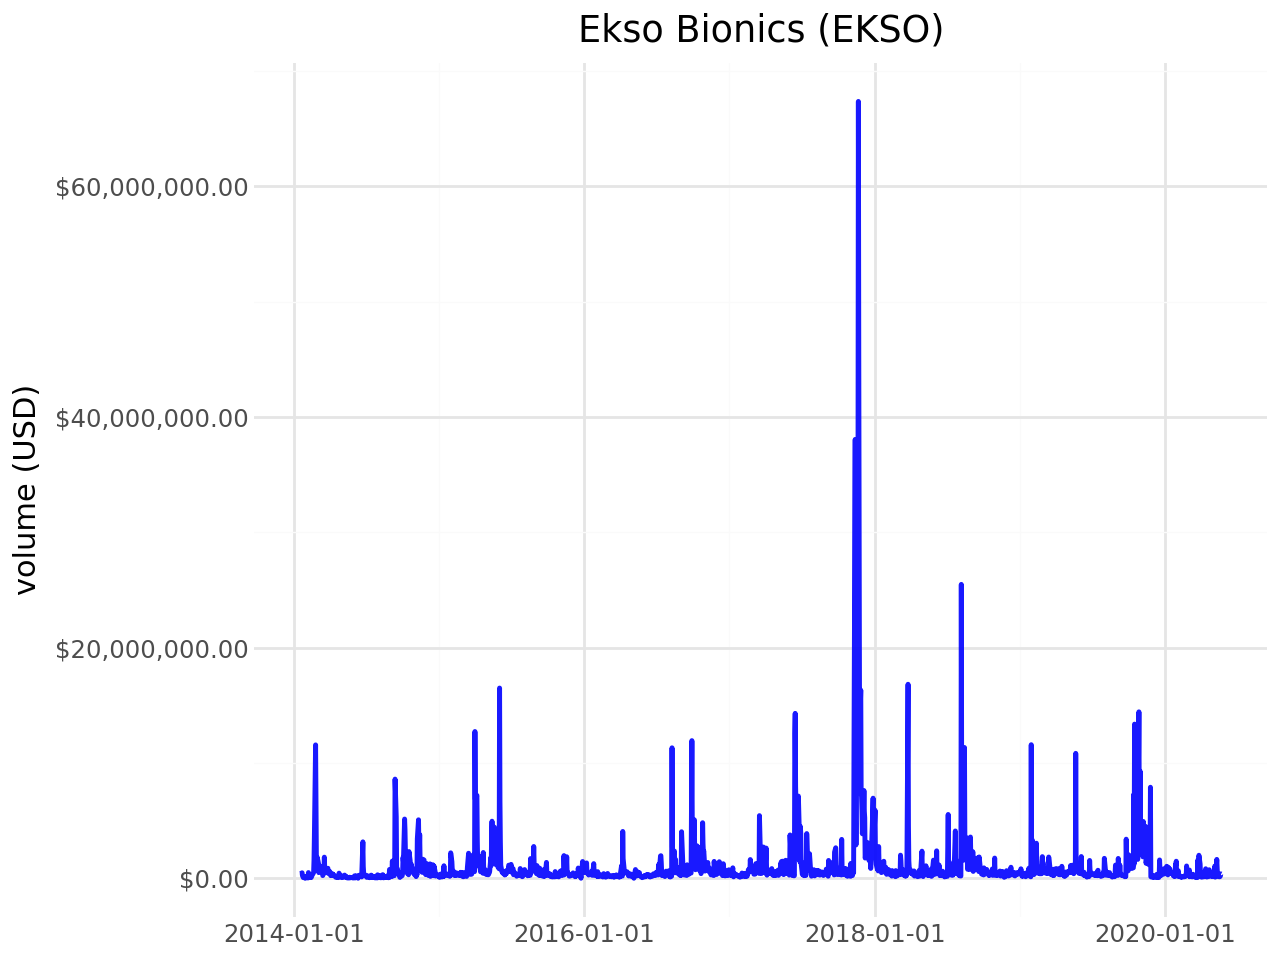

In [5]:
(
    ggplot(df, aes(x='Date', y='Volume (Currency)'))
    + geom_line(color='blue', size=1.0, alpha=0.90)
    + scale_y_continuous(limits=(0,None), labels=label_dollar(big_mark=','))
    + labs(
        title='Ekso Bionics (EKSO)',
        x='',
        y='volume (USD)',
    )
    + theme_minimal()
)